<a href="https://colab.research.google.com/github/BimaDamar/Gabut/blob/master/CryptoAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Desc : Python program for crypto currency analysis

In [0]:
import numpy as np
import pandas as pd

In [0]:
# Load Data
from google.colab import files
uploaded = files.upload()

In [0]:
# Store data to dataframes
df_btc = pd.read_csv('BTC_USD_2020-01-25_2020-04-24-CoinDesk.csv')
df_eth = pd.read_csv('ETH_USD_2020-01-25_2020-04-24-CoinDesk.csv')
df_ltc = pd.read_csv('LTC_USD_2020-01-25_2020-04-24-CoinDesk.csv')

In [0]:
# Print data for bitcoin
df_btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2020-01-25,8451.232296,8381.599774,8512.454207,8220.867389
1,BTC,2020-01-26,8347.567505,8451.232129,8458.283993,8256.043067
2,BTC,2020-01-27,8562.307470,8347.569951,8597.904143,8282.358307
3,BTC,2020-01-28,8881.962391,8562.307388,8982.035440,8554.125634
4,BTC,2020-01-29,9131.114988,8877.733617,9176.388648,8874.284819


In [0]:
# Print data for etherum
df_eth.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,ETH,2020-01-25,162.806522,162.367915,164.216365,155.254417
1,ETH,2020-01-26,160.917868,162.806503,163.726978,157.319803
2,ETH,2020-01-27,166.721866,160.917903,167.550499,159.177313
3,ETH,2020-01-28,169.800113,166.722803,171.781536,164.916159
4,ETH,2020-01-29,173.548148,169.801455,174.234864,169.501864


In [0]:
# Print data for litecoin
df_ltc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,LTC,2020-01-25,54.584005,54.372839,55.278562,50.624532
1,LTC,2020-01-26,53.555052,54.583282,54.752430,52.205505
2,LTC,2020-01-27,55.758657,53.556482,56.510333,52.803634
3,LTC,2020-01-28,58.528749,55.758638,59.475930,55.758596
4,LTC,2020-01-29,59.392175,58.516446,61.400633,57.267201


In [0]:
# Create data frame for closing price of the currency
df = pd.DataFrame({'BTC' : df_btc['Closing Price (USD)'],
                   'ETH' : df_eth['Closing Price (USD)'],
                   'LTC' : df_ltc['Closing Price (USD)'],
})

In [0]:
# Show new data frame
df

,BTC,ETH,LTC
0,8451.232296,162.806522,54.584005
1,8347.567505,160.917868,53.555052
2,8562.307470,166.721866,55.758657
3,8881.962391,169.800113,58.528749
4,9131.114988,173.548148,59.392175
...,...,...,...
86,7185.870303,182.854180,42.875306
87,6856.146435,171.356748,40.675907
88,6904.475773,173.054326,40.959844
89,7118.388748,182.209944,41.767572


In [0]:
# Get statistic on the data
df.describe()

,BTC,ETH,LTC
count,91.000000,91.000000,91.000000
mean,7996.352493,187.639355,54.268677
std,1509.076220,47.743324,15.242331
min,4944.702336,107.898345,32.053195
25%,6794.840149,143.002622,40.584525
50%,7959.228274,181.728434,50.597379
75%,9387.070569,225.173853,69.696947
max,10367.527998,284.000491,83.644499


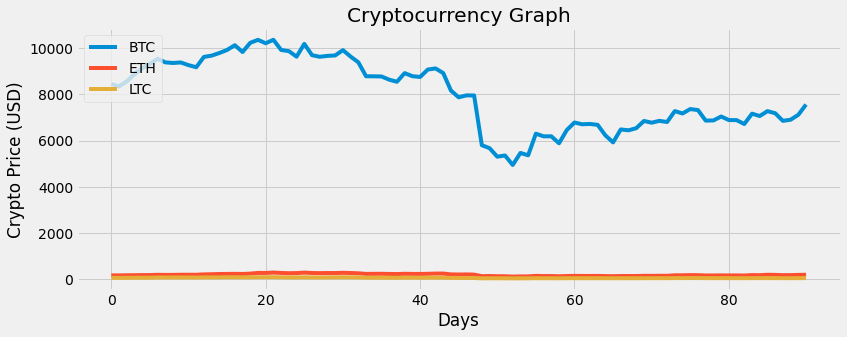

In [0]:
# Visualize the closing price
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

my_crypto = df
plt.figure(figsize = (12.2, 4.5))

for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label = c)

plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price (USD)')
plt.legend(my_crypto.columns.values, loc = 'upper left')
plt.show()

In [0]:
# Scale data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,100))
scaled = min_max_scaler.fit_transform(df)
scaled

array([[ 64.66241363,  31.17973222,  43.67172087],
       [ 62.75077573,  30.10725565,  41.6772905 ],
       [ 66.71070324,  33.40306886,  45.94856272],
       [ 72.60532241,  35.15105815,  51.31786204],
       [ 77.19983848,  37.27938874,  52.99144968],
       [ 80.70102826,  38.36522085,  54.31032666],
       [ 84.83355186,  44.49900147,  71.51535422],
       [ 81.95318627,  41.92458244,  70.45729557],
       [ 81.47949652,  42.51830301,  74.5259372 ],
       [ 81.88642465,  46.23124145,  75.17497294],
       [ 79.75555491,  46.20003212,  72.63925364],
       [ 78.0624819 ,  45.86925212,  69.1876971 ],
       [ 86.31578061,  54.87280658,  78.49111507],
       [ 87.3469916 ,  58.71259614,  79.13115313],
       [ 89.44860175,  64.69812953,  81.30418064],
       [ 91.8907638 ,  65.94529651,  87.61507378],
       [ 95.66975755,  68.22515615,  87.10551827],
       [ 90.25179833,  65.542241  ,  80.88291523],
       [ 97.58626115,  73.80943592,  87.0051595 ],
       [ 99.95202298,  91.13910

In [0]:
# Convert scaled data to data frame
df_scale = pd.DataFrame(scaled, columns = df.columns)

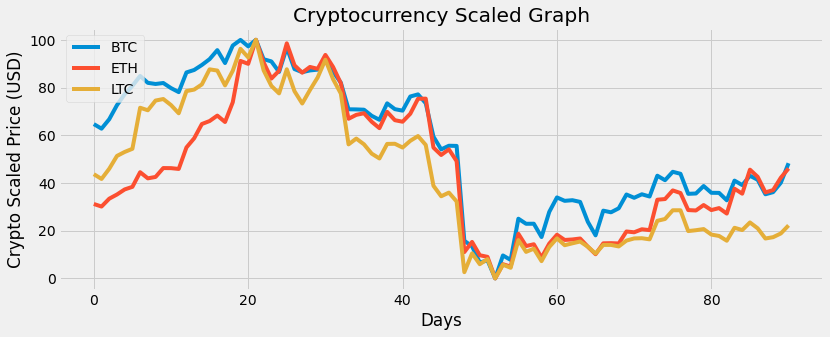

In [0]:
# visualize scaled data
my_crypto = df_scale

plt.figure(figsize = (12.2, 4.5))

for c in my_crypto.columns.values :
  plt.plot(my_crypto[c], label = c)

plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price (USD)')
plt.legend(my_crypto.columns.values, loc = 'upper left')
plt.show()

In [0]:
# Get daily simple return
DSR = df.pct_change(1)
DSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,-0.012266,-0.011601,-0.018851
2,0.025725,0.036068,0.041147
3,0.037333,0.018463,0.049680
4,0.028052,0.022073,0.014752
...,...,...,...
86,-0.012542,-0.028136,-0.028673
87,-0.045885,-0.062878,-0.051298
88,0.007049,0.009907,0.006980
89,0.030982,0.052906,0.019720


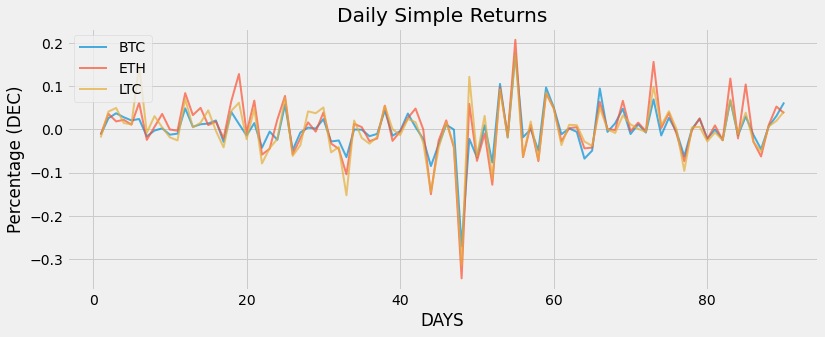

In [0]:
# Visualize daily simple return
plt.figure(figsize = (12, 4.5))

for c in DSR :
  plt.plot(DSR.index, DSR[c], label = c, lw = 2, alpha = .7)

plt.title('Daily Simple Returns')
plt.ylabel('Percentage (DEC)')
plt.xlabel('DAYS')
plt.legend(DSR.columns.values, loc = 'upper left')
plt.show()

In [0]:
# Get volatility
print('The Cryptocurrency Volatility')
DSR.std()

The Cryptocurrency Volatility


BTC    0.049923
ETH    0.067520
LTC    0.063791
dtype: float64

In [0]:
# Average Daily Simple Return
DSR.mean()

BTC    0.000067
ETH    0.004092
LTC   -0.000363
dtype: float64

In [0]:
# Coleration
DSR.corr()

,BTC,ETH,LTC
BTC,1.000000,0.914422,0.881648
ETH,0.914422,1.000000,0.930953
LTC,0.881648,0.930953,1.000000


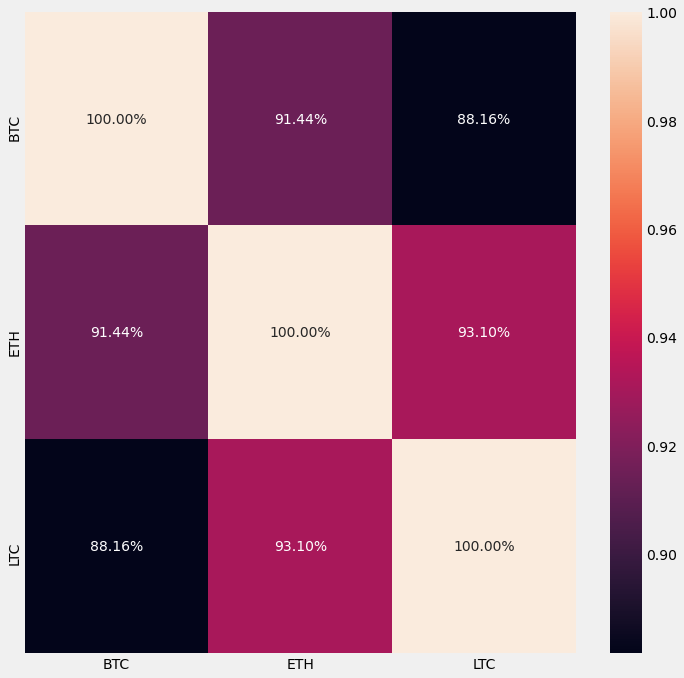

In [0]:
# Visualize Corelation
import seaborn as sns

plt.subplots(figsize = (11,11))
sns.heatmap(DSR.corr(), annot = True, fmt = '.2%')

In [0]:
# Daily cumulative simple return
DCSR = (DSR+1).cumprod()

#Show
DCSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,0.987734,0.988399,0.981149
2,1.013143,1.024049,1.021520
3,1.050967,1.042956,1.072269
4,1.080448,1.065978,1.088088
...,...,...,...
86,0.850275,1.123138,0.785492
87,0.811260,1.052518,0.745198
88,0.816979,1.062945,0.750400
89,0.842290,1.119181,0.765198


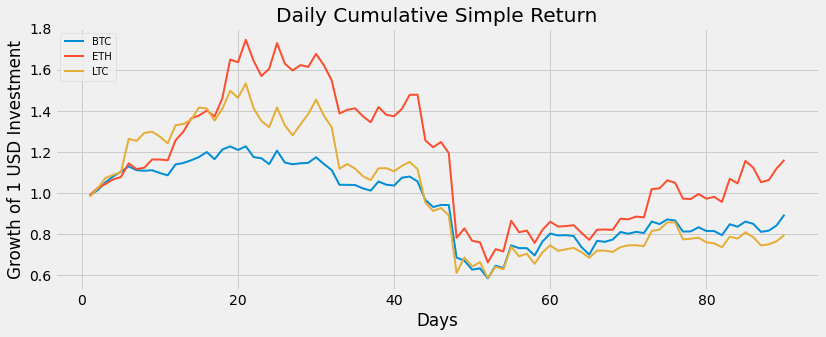

In [0]:
#VIsualize daily cumulative simple return
plt.figure(figsize = (12.2, 4.5))

for c in DCSR.columns.values :
  plt.plot(DCSR.index, DCSR[c], lw = 2, label = c)

plt.title('Daily Cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of 1 USD Investment')
plt.legend(DCSR.columns.values, loc = 'upper left', fontsize = 10)
plt.show()